# 0. Import Libraries & Datasets

In [1]:
import numpy as np
import pandas as pd
import string
import seaborn as sns
pd.set_option("max_columns", None)

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize
from nltk.collocations import BigramAssocMeasures, TrigramAssocMeasures, BigramCollocationFinder

In [2]:
reviews = pd.read_csv("data/LosAngeles/reviews.csv")
listings = pd.read_csv("data/LosAngeles/listings.csv")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20200213032707,2020-02-13,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...",none,NaN,NaN,NaN,NaN,NaN,Camelot NEW RESIDENTS’ GENERAL INFORMATION F...,NaN,NaN,https://a0.muscache.com/im/pictures/4321499/1d...,NaN,521,https://www.airbnb.com/users/show/521,Paolo,2008-06-27,"San Francisco, California, United States",Search for me on the Internet with the keyword...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/521/profile_p...,https://a0.muscache.com/im/users/521/profile_p...,Culver City,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Culver City, CA, United States",Culver City,Culver City,Other Cities,Culver City,CA,90230,Los Angeles,"Culver City, CA",US,United States,33.98209,-118.38494,t,Condominium,Entire home/apt,6,2.0,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$122.00,$904.00,"$2,851.00",$500.00,$240.00,3,$25.00,30,730,30,30,730,730,30.0,730.0,3 days ago,t,0,0,0,0,2020-02-13,2,0,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,f,NaN,"{""Culver City"","" CA""}",f,f,strict_14_with_grace_period,t,f,1,1,0,0,0.02
1,344,https://www.airbnb.com/rooms/344,20200213032707,2020-02-13,Family perfect;Pool;Near Studios!,This home is perfect for families; aspiring ch...,"Cheerful & comfortable; near studios, amusemen...",This home is perfect for families; aspiring ch...,none,Quiet-yet-close to all the fun in LA! Hollywoo...,"One dog may be on premises, friendly and cared...",Short drive to subway and elevated trains runn...,"Pool, patio and self-contained main house all ...",Host and caretaker may be available throughout...,Host asks that guests refrain from partying lo...,NaN,NaN,https://a0.muscache.com/im/pictures/cc4b724d-d...,NaN,767,https://www.airbnb.com/users/show/767,Melissa,2008-07-11,"Burbank, California, United States","Single mother, CEO and Owner of an internation...",within a day,75%,29%,f,https://a0.muscache.com/im/users/767/profile_p...,https://a0.muscache.com/im/users/767/profile_p...,Burbank,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'kba', ...",t,t,"Burbank, CA, United 

In [4]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [5]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,109,449036,2011-08-15,927861,Edwin,The host canceled my reservation the day befor...
1,109,74506539,2016-05-15,22509885,Jenn,Me and two friends stayed for four and a half ...
2,344,79805581,2016-06-14,2089550,Drew & Katie,We really enjoyed our stay here in Burbank! Th...
3,344,120725697,2016-12-11,32602867,Christopher,I had a ton of fun learning to play Go with Fu...
4,344,123800867,2016-12-30,35822259,May,The host canceled this reservation the day bef...


# 1. Sentiment Analysis

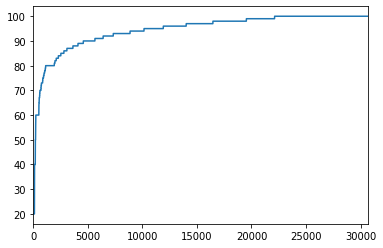

In [6]:
listings['review_scores_rating'].sort_values().reset_index(drop=True).dropna().plot()

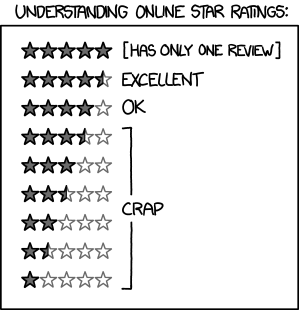

In [7]:
from IPython.display import Image

Image("https://imgs.xkcd.com/comics/star_ratings.png")

## 1.1 Text Cleaning and Processing

In [8]:
sid = SentimentIntensityAnalyzer()
for sentence in reviews['comments'].values[:5]:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

The host canceled my reservation the day before arrival.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Me and two friends stayed for four and a half months. It was a great place to stay! The apartment was very comfortable and I really enjoyed having the park with running path across the street. The only downside was it wasn't within walking distance to restaurants, bars, or coffee shops. But they are a short drive away. Overall, great stay!
compound: 0.9588, neg: 0.028, neu: 0.708, pos: 0.265, 
We really enjoyed our stay here in Burbank! The house was clean and great for our family. The host and caretaker were very easy to get a hold of with questions and the pool was a wonderful bonus! Two dogs out back live on the property and were very friendly and sweet. Thanks for everything! 
compound: 0.9853, neg: 0.0, neu: 0.584, pos: 0.416, 
I had a ton of fun learning to play Go with Fuko! She was an excellent teacher and fun person to talk to. It was cool hanging out with her and her friends

Our reviews contain both null reviews and reviews in other languages. Filter out non English-language reviews (use nltk/langdetect to solve this problem later)

In [9]:
from nltk.corpus import stopwords   # stopwords to detect language
from nltk import wordpunct_tokenize # function to split up our words

def get_language_likelihood(input_text):
    """Return a dictionary of languages and their likelihood of being the 
    natural language of the input text
    """
 
    input_text = input_text.lower()
    input_words = wordpunct_tokenize(input_text)
 
    language_likelihood = {}
    total_matches = 0
    for language in stopwords._fileids:
        language_likelihood[language] = len(set(input_words) &
                set(stopwords.words(language)))
 
    return language_likelihood
 
def get_language(input_text):
    """Return the most likely language of the given text
    """ 
    likelihoods = get_language_likelihood(input_text)
    return sorted(likelihoods, key=likelihoods.get, reverse=True)[0]

In [10]:
reviews_f = [r for r in reviews['comments'] if pd.notnull(r) and get_language(r) == 'english']

## 1.2 Generating Scores

In [11]:
pscores = [sid.polarity_scores(comment) for comment in reviews_f]

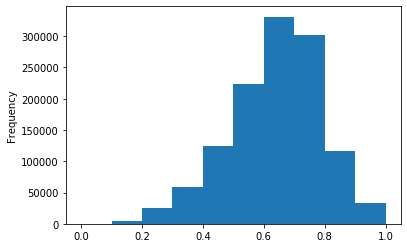

In [12]:
# Neutrality
pd.Series([score['neu'] for score in pscores]).plot(kind='hist')

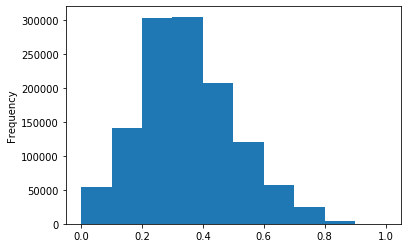

In [13]:
# Positivity
pd.Series([score['pos'] for score in pscores]).plot(kind='hist')

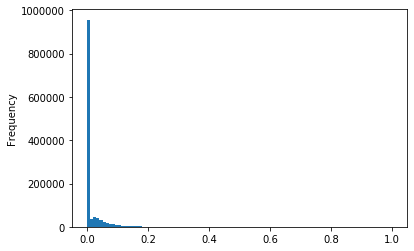

In [14]:
# Negativity
pd.Series([score['neg'] for score in pscores]).plot(kind='hist', bins=100)

In [15]:
scored_reviews = pd.DataFrame()
scored_reviews['review'] = [r for r in reviews_f if get_language(r) == 'english']
scored_reviews['compound'] = [score['compound'] for score in pscores]
scored_reviews['negativity'] = [score['neg'] for score in pscores]
scored_reviews['neutrality'] = [score['neu'] for score in pscores]
scored_reviews['positivity'] = [score['pos'] for score in pscores]

In [16]:
scored_reviews.head()

,review,compound,negativity,neutrality,positivity
0,The host canceled my reservation the day befor...,0.0000,0.000,1.000,0.000
1,Me and two friends stayed for four and a half ...,0.9588,0.028,0.708,0.265
2,We really enjoyed our stay here in Burbank! Th...,0.9853,0.000,0.584,0.416
3,I had a ton of fun learning to play Go with Fu...,0.9758,0.020,0.614,0.365
4,The host canceled this reservation the day bef...,0.0000,0.000,1.000,0.000


In [20]:
# merge the scored reviews with original reviews data to get corresponding listing ID
merged = scored_reviews.merge(reviews, left_index=True, right_index=True)
merged = merged[merged.columns[:6]]

# calculate the mean sentiment of the listings with reviews
table = pd.pivot_table(merged,index=['listing_id'],values=['negativity','neutrality','positivity'],aggfunc=np.mean)
table.head()

,negativity,neutrality,positivity
listing_id,,,
109,0.014000,0.854000,0.132500
344,0.011875,0.685125,0.302875
2708,0.002043,0.629261,0.368696
2732,0.015000,0.693714,0.291238
5728,0.009912,0.627489,0.362612


In [25]:
# find the IDs of houses with more nagative over positive comments and significant negativity
del_listID_LA = table.query('negativity>positivity').query('negativity>0.1').index
del_listID_LA

Int64Index([ 3219230,  5348264, 11621322, 13436847, 14015860, 16123631,
            17300196, 18359750, 18805569, 19295169, 19457974, 20235501,
            20541631, 21847056, 22546268, 22571861, 23040875, 23824722,
            24015130, 25372130, 25599202, 25935699, 26341271, 26955261,
            28129836, 28661410, 28890632, 28990111, 30176205],
           dtype='int64', name='listing_id')

In [26]:
# filter unreasonable pricing record from the listings dataset
filtered_listings_LA = listings[~listings.id.isin(del_listID_LA)]
filtered_listings_LA

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20200213032707,2020-02-13,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...",none,NaN,NaN,NaN,NaN,NaN,Camelot NEW RESIDENTS’ GENERAL INFORMATION F...,NaN,NaN,https://a0.muscache.com/im/pictures/4321499/1d...,NaN,521,https://www.airbnb.com/users/show/521,Paolo,2008-06-27,"San Francisco, California, United States",Search for me on the Internet with the keyword...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/521/profile_p...,https://a0.muscache.com/im/users/521/profile_p...,Culver City,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Culver City, CA, United States",Culver City,Culver City,Other Cities,Culver City,CA,90230,Los Angeles,"Culver City, CA",US,United States,33.982090,-118.384940,t,Condominium,Entire home/apt,6,2.0,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$122.00,$904.00,"$2,851.00",$500.00,$240.00,3,$25.00,30,730,30,30,730,730,30.0,730.0,3 days ago,t,0,0,0,0,2020-02-13,2,0,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,f,NaN,"{""Culver City"","" CA""}",f,f,strict_14_with_grace_period,t,f,1,1,0,0,0.02
1,344,https://www.airbnb.com/rooms/344,20200213032707,2020-02-13,Family perfect;Pool;Near Studios!,This home is perfect for families; aspiring ch...,"Cheerful & comfortable; near studios, amusemen...",This home is perfect for families; aspiring ch...,none,Quiet-yet-close to all the fun in LA! Hollywoo...,"One dog may be on premises, friendly and cared...",Short drive to subway and elevated trains runn...,"Pool, patio and self-contained main house all ...",Host and caretaker may be available throughout...,Host asks that guests refrain from partying lo...,NaN,NaN,https://a0.muscache.com/im/pictures/cc4b724d-d...,NaN,767,https://www.airbnb.com/users/show/767,Melissa,2008-07-11,"Burbank, California, United States","Single mother, CEO and Owner of an internation...",within a day,75%,29%,f,https://a0.muscache.com/im/users/767/profile_p...,https://a0.muscache.com/im/users/767/profile_p...,Burbank,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'kba', ...",t,t,"Burbank, CA, Unite

In [28]:
filtered_listings_LA.to_csv('filtered_listings_LA.csv')

In [27]:
# check if there's any missing data in this process
listings.shape[0]-del_listID_LA.shape[0]-filtered_listings_LA.shape[0]

0

# 2. Generate Summary

use `nltk` to find collocations which have a high amount of importance in the text, and we'd like to take and display them as summaries of our texts, just like a "highlighter".

In [ ]:
# Filter out the null and non-English reviews
reviews_df = reviews[reviews.apply(lambda srs: pd.notnull(srs['comments']) and (get_language(srs['comments']) == 'english'), axis='columns')]

In [ ]:
# Check the reviews we need to process per location
reviews_df.groupby('listing_id')['comments'].count().plot(kind='hist', bins=20)

In [ ]:
review_words = reviews_df.groupby('listing_id').apply(
    lambda df: np.concatenate(np.array([word_tokenize(r) for r in df['comments'].values]))
)

In [ ]:
review_words_f = review_words.map(lambda arr: np.array([w for w in arr if w not in string.punctuation]))

In [ ]:
review_words_f.head()

In [ ]:
def reattach_contractions(wordlist):
    words = []
    for i, word in enumerate(wordlist):
        if word[0] == "'" or word == "n't":
            words[-1] = words[-1] + word
        else:
            words.append(word)
    return words

In [ ]:
review_words_f = review_words_f.map(reattach_contractions)

In [ ]:
# Check the number of words to process per review
review_words_f.map(len).plot(kind='hist', bins=20)

As is shown above, it seems that the reviews with number of words below 20 have not enough information for highlighting to work, so we can do some cut-off to improve the efficiency of our work.

In [ ]:
def bigramify(words):
    finder = BigramCollocationFinder.from_words(words)
    finder.apply_freq_filter(3) 
    return finder.nbest(bigram_measures.pmi, 3)

review_bigrams = review_words_f.map(bigramify)

In [ ]:
review_bigrams.head(10)